In [ ]:
%pip install pandas numpy openpyxl matplotlib

In [26]:
import pandas as pd
print("Environment is ready!")


print(f"Pandas version: {pd.__version__}")

Environment is ready!
Pandas version: 2.2.3


In [28]:
import pandas as pd

# 1. Load the dataset
# If your file is in the same folder as this notebook, just use the name.
file_path = 'Zillow_Housing_Dataset.csv'
df = pd.read_csv(file_path)

# 2. View the first 5 rows to see the columns
print("--- First 5 Rows ---")
display(df.head())

# 3. Check data types and missing values
print("\n--- Dataset Info ---")
df.info()

# 4. List all column names (helpful for the next step of cleaning)
print("\n--- Column Names ---")
print(df.columns.tolist())

--- First 5 Rows ---


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30,2025-10-31,2025-11-30,2025-12-31
0,102001,0,United States,country,NaN,120438.319923,120650.209537,120912.983858,121476.583196,122125.218463,...,357612.951205,357092.990063,356417.996510,355810.294479,355390.262173,355166.149594,355403.981336,355831.508982,356496.909241,357275.367233
1,394913,1,"New York, NY",msa,NY,216079.651603,216997.868206,217924.589149,219802.484377,221747.109917,...,681693.678562,684104.823766,685856.506483,687317.851217,688479.047533,689261.406036,690648.448485,692961.405617,696271.386684,699658.379149
2,753899,2,"Los Angeles, CA",msa,CA,218371.605743,219184.225184,220266.626529,222420.241601,224775.621328,...,943203.974273,938949.357513,934245.245616,929954.117322,927399.461277,926343.623500,927385.106343,929766.414358,933035.896593,936938.582436
3,394463,3,"Chicago, IL",msa,IL,150621.346426,150760.777915,151026.327642,151686.949370,152481.597849,...,324946.583187,325536.495524,325821.754976,326176.067308,326999.945994,327977.388591,329285.901364,330566.688185,332085.845226,333786.344335
4,394514,4,"Dallas, TX",msa,TX,126453.664887,126509.987791,126574.736735,126742.882942,126964.579111,...,369732.296582,367624.873396,365231.083313,362888.919726,360890.913402,359541.413933,358900.323816,358554.951977,358293.726281,358078.023328



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Columns: 317 entries, RegionID to 2025-12-31
dtypes: float64(312), int64(2), object(3)
memory usage: 2.2+ MB

--- Column Names ---
['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31', '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31', '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30', '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31', '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31', '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30', '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31', '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31', '2004-01-31', '2004-02-29', '2004-03-

In [29]:
id_vars = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
zillow_long = pd.melt(df, id_vars=id_vars, var_name='date', value_name='price')

# Convert the date column to actual dates
zillow_long['date'] = pd.to_datetime(zillow_long['date'])

print("Zillow data is now aligned!")
display(zillow_long)

Zillow data is now aligned!


,RegionID,SizeRank,RegionName,RegionType,StateName,date,price
0,102001,0,United States,country,NaN,2000-01-31,120438.319923
1,394913,1,"New York, NY",msa,NY,2000-01-31,216079.651603
2,753899,2,"Los Angeles, CA",msa,CA,2000-01-31,218371.605743
3,394463,3,"Chicago, IL",msa,IL,2000-01-31,150621.346426
4,394514,4,"Dallas, TX",msa,TX,2000-01-31,126453.664887
...,...,...,...,...,...,...,...
279235,753929,935,"Zapata, TX",msa,TX,2025-12-31,120803.924158
279236,394743,936,"Ketchikan, AK",msa,AK,2025-12-31,378260.716733
279237,753874,937,"Craig, CO",msa,CO,2025-12-31,296653.719069
279238,395188,938,"Vernon, TX",msa,TX,2025-12-31,91348.202071


In [30]:
# 1. Standardize Geographic Identifiers
# names lowercase and strip extra spaces
zillow_long['RegionName'] = zillow_long['RegionName'].astype(str).str.strip()
zillow_long['StateName'] = zillow_long['StateName'].astype(str).str.strip()

# 2. Handle missing or sparse time-series data =carry the last known price forward.
zillow_long = zillow_long.sort_values(by=['RegionName', 'date'])
zillow_long['price'] = zillow_long.groupby('RegionName')['price'].ffill()

# 3. Aggregate housing prices by City/Metro over time = one average price per date.
zillow_cleaned = zillow_long.groupby(['RegionName', 'StateName', 'date'])['price'].mean().reset_index()

# 4. Rename columns 
zillow_cleaned.columns = ['city', 'state', 'date', 'average_price']
zillow_cleaned.to_csv('Zillow_Cleaned.csv', index=False)

print("\n--- Week 4 Cleaning Complete ---")
display(zillow_cleaned.head())


--- Week 4 Cleaning Complete ---


,city,state,date,average_price
0,"Aberdeen, SD",SD,2000-01-31,NaN
1,"Aberdeen, SD",SD,2000-02-29,NaN
2,"Aberdeen, SD",SD,2000-03-31,NaN
3,"Aberdeen, SD",SD,2000-04-30,NaN
4,"Aberdeen, SD",SD,2000-05-31,NaN


In [31]:
# 1. Sort the data so time flows correctly for each city
zillow_long = zillow_long.sort_values(by=['RegionName', 'date'])

# 2. Fill small gaps (Forward Fill)- carries the last known price forward
zillow_long['price'] = zillow_long.groupby('RegionName')['price'].ffill()

# 3. Drop the remaining NaNs
zillow_final = zillow_long.dropna(subset=['price'])

print(f"Removed {zillow_long['price'].isna().sum()} empty rows.")
print("--- Final Cleaned Data ---")
display(zillow_final.head())

Removed 48834 empty rows.
--- Final Cleaned Data ---


,RegionID,SizeRank,RegionName,RegionType,StateName,date,price
98213,394297,677,"Aberdeen, SD",msa,SD,2009-02-28,126009.195896
99108,394297,677,"Aberdeen, SD",msa,SD,2009-03-31,126022.016466
100003,394297,677,"Aberdeen, SD",msa,SD,2009-04-30,125830.197655
100898,394297,677,"Aberdeen, SD",msa,SD,2009-05-31,125721.598534
101793,394297,677,"Aberdeen, SD",msa,SD,2009-06-30,125532.240855


In [32]:
display(zillow_final.head(100))

,RegionID,SizeRank,RegionName,RegionType,StateName,date,price
98213,394297,677,"Aberdeen, SD",msa,SD,2009-02-28,126009.195896
99108,394297,677,"Aberdeen, SD",msa,SD,2009-03-31,126022.016466
100003,394297,677,"Aberdeen, SD",msa,SD,2009-04-30,125830.197655
100898,394297,677,"Aberdeen, SD",msa,SD,2009-05-31,125721.598534
101793,394297,677,"Aberdeen, SD",msa,SD,2009-06-30,125532.240855
...,...,...,...,...,...,...,...
183238,394297,677,"Aberdeen, SD",msa,SD,2017-01-31,145953.848895
184133,394297,677,"Aberdeen, SD",msa,SD,2017-02-28,146338.675123
185028,394297,677,"Aberdeen, SD",msa,SD,2017-03-31,146604.691345
185923,394297,677,"Aberdeen, SD",msa,SD,2017-04-30,146863.940857


In [33]:
# Save the cleaned Zillow data to a CSV file
zillow_final.to_csv('cleaned_zillow_data.csv', index=False)

print("File 'cleaned_zillow_data.csv' has been exported!")

File 'cleaned_zillow_data.csv' has been exported!


In [48]:
import pandas as pd

# 1. LOAD ALL 5 DATASETS
df_100plus = pd.read_csv('companies_us_100plus_clean.csv') # Image 2
df_firmscape = pd.read_csv('firmscape_active_businesses_clean-2.csv') # Image 3
df_kaggle = pd.read_csv('kaggle_companies_cleaned.csv') # Image 4
df_hpi = pd.read_csv('cleaned_housing_data.csv') # Image 5
df_zillow = pd.read_csv('cleaned_zillow_data.csv') # Image 1/6

# 2. STANDARDIZE HOUSING (Zillow & HPI)
# Split Zillow "City, State" into two columns
if 'RegionName' in df_zillow.columns:
    df_zillow[['city', 'state']] = df_zillow['RegionName'].str.split(', ', expand=True)

df_hpi = df_hpi.rename(columns={'City': 'city', 'State': 'state', 'Date': 'date'})
df_hpi['date'] = pd.to_datetime(df_hpi['date'])
df_zillow['date'] = pd.to_datetime(df_zillow['date'])

# Combine housing data sources
housing_combined = pd.merge(df_hpi, df_zillow, on=['city', 'state', 'date'], how='outer')

# 3. STANDARDIZE COMPANIES
df_kaggle = df_kaggle.rename(columns={'locality': 'city'})
company_master = pd.concat([df_100plus, df_firmscape, df_kaggle], ignore_index=True)

# 4. THE "MATCHMAKER" CLEANING (Crucial Step)
# This removes periods and extra spaces so "St. Louis" matches "St Louis"
def clean_names(text):
    return str(text).strip().replace('.', '').title()

for df in [company_master, housing_combined]:
    df['city'] = df['city'].apply(clean_names)
    df['state'] = df['state'].astype(str).str.strip().str.upper()

# 5. GET LATEST HOUSING PRICE ONLY
# We pick the most recent date so companies don't repeat 300 times
latest_date = housing_combined['date'].max()
housing_latest = housing_combined[housing_combined['date'] == latest_date].copy()

# 6. THE FINAL MERGE (Left Join)
# 'left' keeps ALL companies, even if they don't have housing data
final_data = pd.merge(company_master, housing_latest, on=['city', 'state'], how='left')

# SAVE AND VIEW
final_data.to_csv('Final_Merged_Companies_Housing.csv', index=False)
print(f"Merge Complete! We kept all {len(final_data)} companies.")
display(final_data.head())

Merge Complete! We kept all 831413 companies.


,name,industry,size,type,founded,city,state,country_code,location_account_#,firm_name,...,date,cbsa_code,hpi_index,pct_change,RegionID,SizeRank,RegionName,RegionType,StateName,price
0,"1-14 CAV, 3-2 Stryker BDE, US Army",armed forces,1K-5K,Government Agency,1901.0,Lewis-Mcchord,WASHINGTON,US,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100 People Macomb,philanthropic fundraising services,51-200,Nonprofit,2018.0,Sterling Heights,MICHIGAN,US,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"128 Plumbing, Heating, Cooling & Electric",furniture and home furnishings manufacturing,51-200,Privately Held,1992.0,Wakefield,MASSACHUSETTS,US,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1ST Choice Energy Services,oil and gas,201-500,Public Company,1933.0,New Philadelphia,OHIO,US,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1st Choice, LLC",business consulting and services,201-500,Privately Held,2000.0,Silver Spring,MARYLAND,US,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


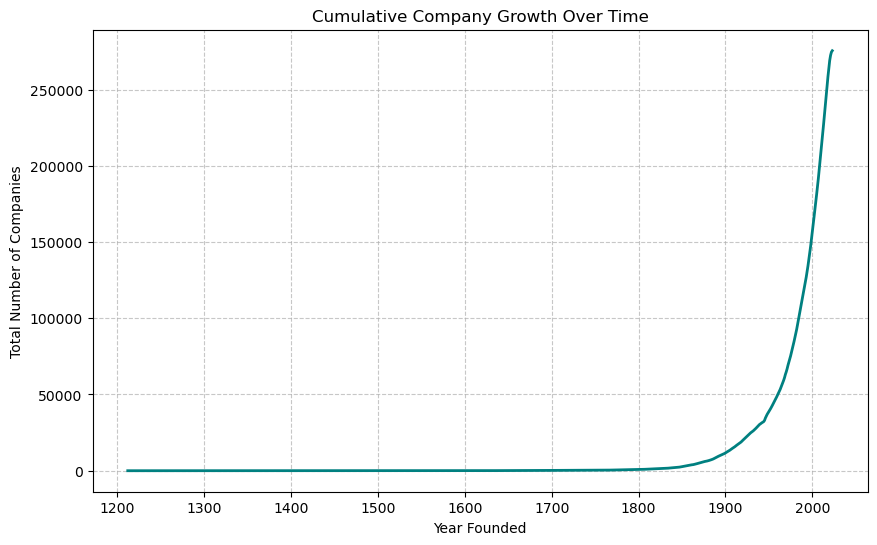

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean
df = pd.read_csv('Final_Merged_Companies_Housing.csv', low_memory=False)
df.columns = df.columns.str.strip()

# Convert 'founded' to a number, ignoring rows with missing years
df['founded'] = pd.to_numeric(df['founded'], errors='coerce')
df = df.dropna(subset=['founded']).sort_values('founded')

# Count how many companies were founded each year
yearly_counts = df.groupby('founded').size().cumsum()

# Plotting the progression
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, color='teal', linewidth=2)
plt.title('Cumulative Company Growth Over Time')
plt.xlabel('Year Founded')
plt.ylabel('Total Number of Companies')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

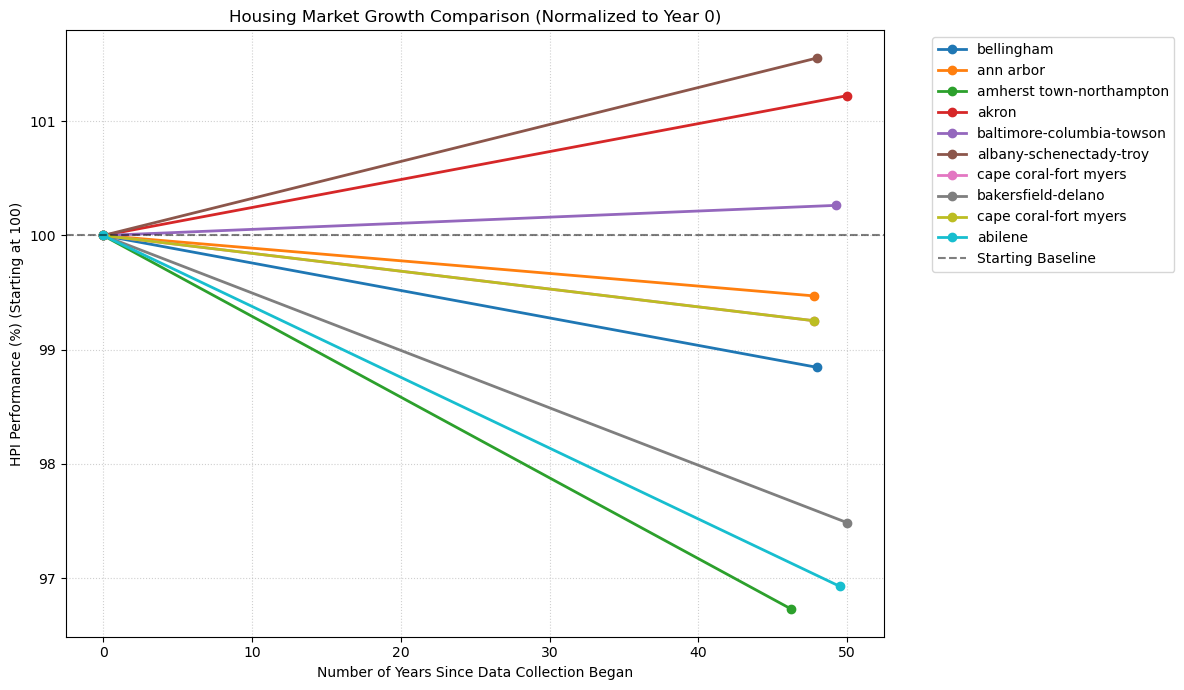

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('merged_companies_housing (1).csv', low_memory=False)
df.columns = df.columns.str.strip()

# 1. Convert dates and calculate the duration in years for each record
df['earliest_housing_date'] = pd.to_datetime(df['earliest_housing_date'])
df['latest_housing_date'] = pd.to_datetime(df['latest_housing_date'])
df['years_elapsed'] = (df['latest_housing_date'] - df['earliest_housing_date']).dt.days / 365.25

# 2. Plotting the first 10 cities to keep the graph readable
plt.figure(figsize=(12, 7))

for i, row in df.head(10).iterrows():
    city = row['city_y']
    duration = row['years_elapsed']
    total_growth = row['pct_change'] # This is the % change visible in your data
    
    # We plot each city starting at (0, 100) and ending at (Years, 100 + Growth)
    x = [0, duration]
    y = [100, 100 + total_growth] 
    
    plt.plot(x, y, marker='o', label=city, linewidth=2)

# Add a baseline at 100 for easy reference
plt.axhline(100, color='black', linestyle='--', alpha=0.5, label='Starting Baseline')

plt.title('Housing Market Growth Comparison (Normalized to Year 0)')
plt.xlabel('Number of Years Since Data Collection Began')
plt.ylabel('HPI Performance (%) (Starting at 100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

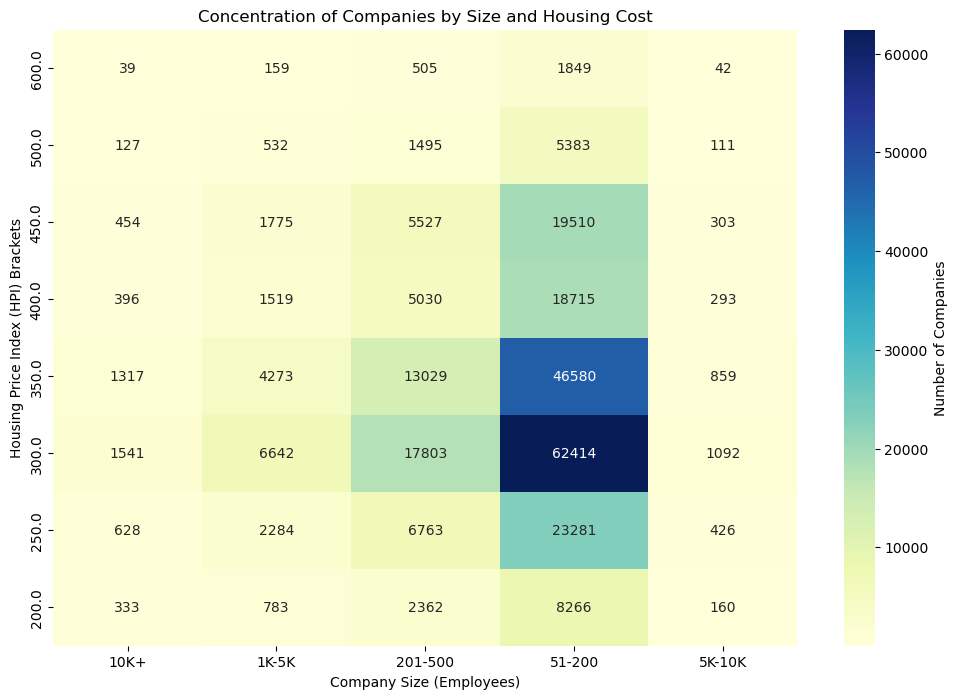

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('merged_companies_housing (1).csv', low_memory=False)
df.columns = df.columns.str.strip()

# 1. Clean HPI and filter for rows that have both Size and HPI
df['hpi_index'] = pd.to_numeric(df['hpi_index'], errors='coerce')
plot_df = df.dropna(subset=['size', 'hpi_index'])

# 2. Only include categories with significant data to stop the "empty" look
# Looking at your previous output, these are the main groups:
main_sizes = ['51-200', '201-500', '1K-5K', '5K-10K', '10K+']
plot_df = plot_df[plot_df['size'].isin(main_sizes)]

# 3. Create a pivot table to "count" companies in each price bracket
# We'll group HPI into $50 increments to make the heatmap blocks bigger
plot_df['hpi_bin'] = (plot_df['hpi_index'] // 50) * 50
heatmap_data = plot_df.groupby(['hpi_bin', 'size']).size().unstack(fill_value=0)

# 4. Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Number of Companies'})

plt.title('Concentration of Companies by Size and Housing Cost')
plt.xlabel('Company Size (Employees)')
plt.ylabel('Housing Price Index (HPI) Brackets')
plt.gca().invert_yaxis() # Put higher prices at the top
plt.show()

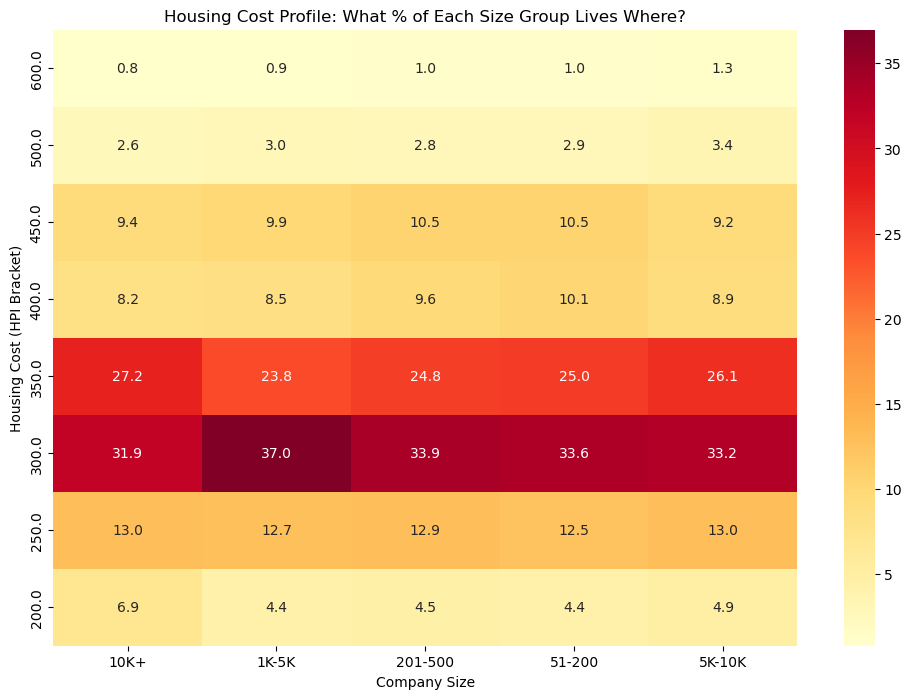

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('merged_companies_housing (1).csv', low_memory=False)
df.columns = df.columns.str.strip()

# 1. Clean HPI and Filter for the main groups seen in your screenshots
df['hpi_index'] = pd.to_numeric(df['hpi_index'], errors='coerce')
main_sizes = ['51-200', '201-500', '1K-5K', '5K-10K', '10K+']
plot_df = df[df['size'].isin(main_sizes)].copy()

# 2. Create larger HPI Brackets (groups of 50) to clear up the "choppiness"
plot_df['hpi_bin'] = (plot_df['hpi_index'] // 50) * 50

# 3. CRITICAL STEP: Normalize by Column (Percentages)
counts = plot_df.groupby(['hpi_bin', 'size']).size().unstack(fill_value=0)
pct_data = (counts / counts.sum()) * 100

# 4. Final Clean-up Plot
plt.figure(figsize=(12, 8))
sns.heatmap(pct_data, annot=True, fmt=".1f", cmap="YlOrRd") # Yellow to Red shows 'Heat' better

plt.title('Housing Cost Profile: What % of Each Size Group Lives Where?')
plt.xlabel('Company Size')
plt.ylabel('Housing Cost (HPI Bracket)')
plt.gca().invert_yaxis() 
plt.show()

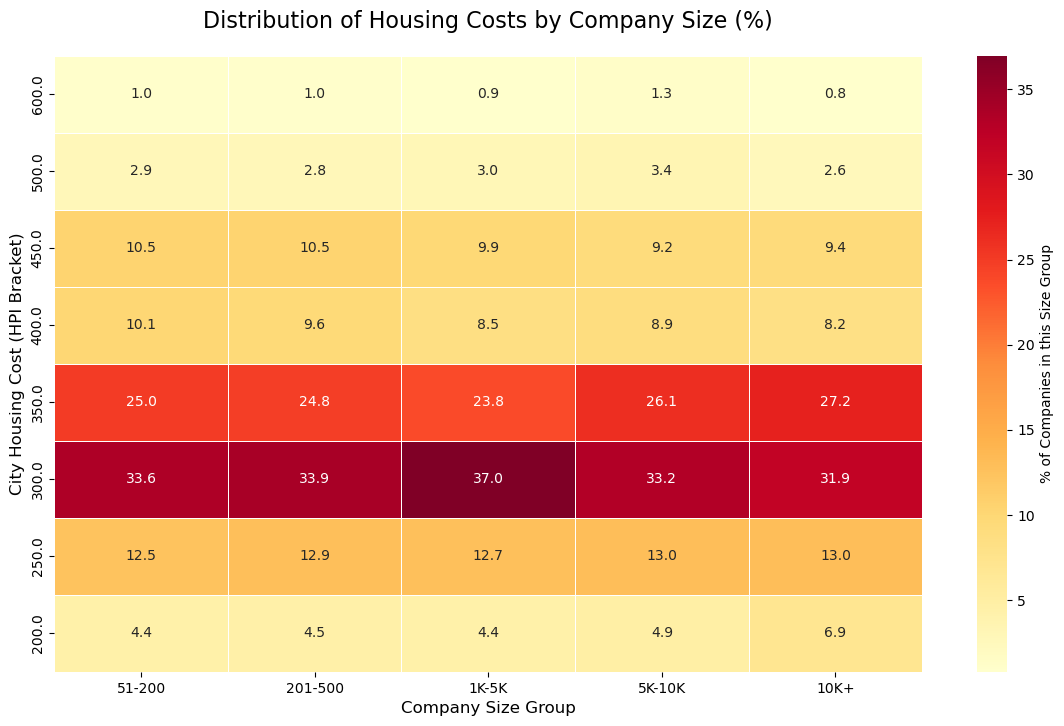

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Setup and Cleaning
# Using the exact name from your snippet
df = pd.read_csv('merged_companies_housing (1).csv', low_memory=False)
df.columns = df.columns.str.strip()
df['hpi_index'] = pd.to_numeric(df['hpi_index'], errors='coerce')

# 2. Updated size order (Removing the 501-1000 category)
size_order = ['51-200', '201-500', '1K-5K', '5K-10K', '10K+']
plot_df = df[df['size'].isin(size_order)].copy()

# 3. Create 50-unit HPI brackets
plot_df['hpi_bin'] = (plot_df['hpi_index'] // 50) * 50

# 4. Calculate Column-wise Percentages
counts = plot_df.groupby(['hpi_bin', 'size']).size().unstack(fill_value=0)

# Filter size_order to only include columns that actually exist in 'counts'
existing_sizes = [s for s in size_order if s in counts.columns]
counts = counts[existing_sizes]

pct_data = (counts / counts.sum()) * 100

# 5. Plotting
plt.figure(figsize=(14, 8))
sns.heatmap(pct_data, 
            annot=True, 
            fmt=".1f", 
            cmap="YlOrRd", 
            linewidths=.5,
            cbar_kws={'label': '% of Companies in this Size Group'})

plt.title('Distribution of Housing Costs by Company Size (%)', fontsize=16, pad=20)
plt.xlabel('Company Size Group', fontsize=12)
plt.ylabel('City Housing Cost (HPI Bracket)', fontsize=12)
plt.gca().invert_yaxis() 
plt.show()

/var/folders/f_/87g20vj10158bjplkfc5yhxr0000gn/T/ipykernel_33094/2965031283.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='hpi_index', y='region', order=region_order, palette='Set2')


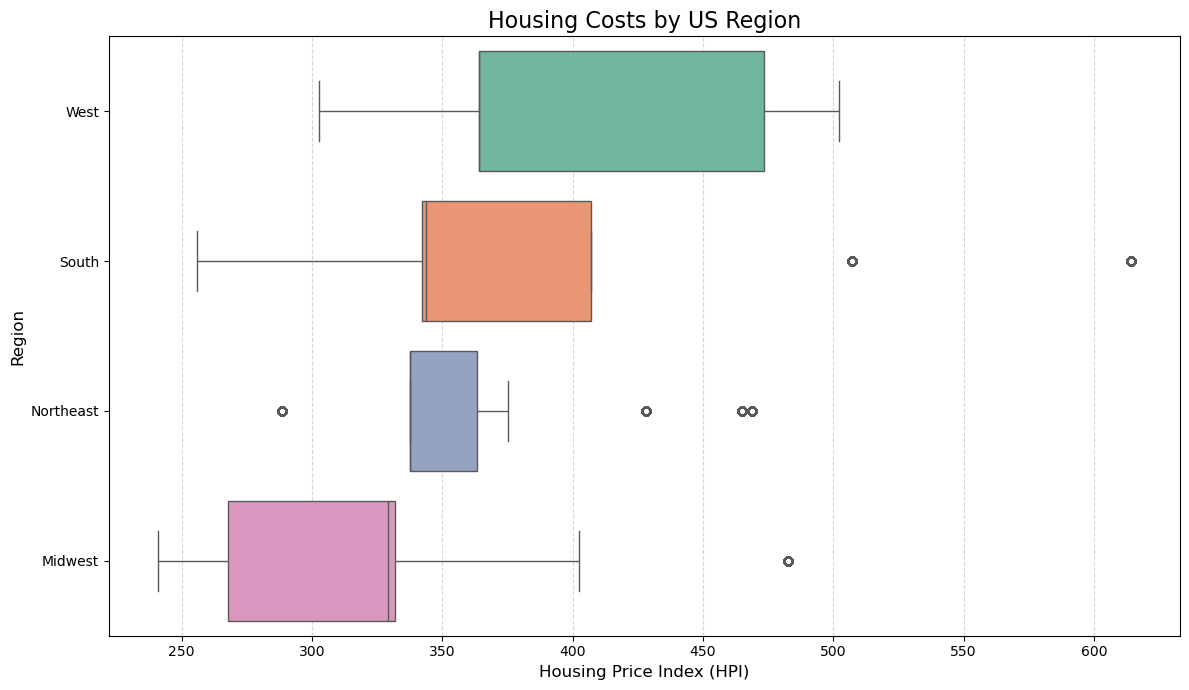

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
df = pd.read_csv('merged_companies_housing (1).csv', low_memory=False)
df.columns = df.columns.str.strip()
df['hpi_index'] = pd.to_numeric(df['hpi_index'], errors='coerce')

# 2. Define Regional Mapping
region_map = {
    'WA': 'West', 'OR': 'West', 'CA': 'West', 'NV': 'West', 'ID': 'West', 'MT': 'West', 'WY': 'West', 'UT': 'West', 'AZ': 'West', 'CO': 'West', 'NM': 'West', 'AK': 'West', 'HI': 'West',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'WI': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest', 'OH': 'Midwest',
    'TX': 'South', 'OK': 'South', 'AR': 'South', 'LA': 'South', 'MS': 'South', 'AL': 'South', 'TN': 'South', 'KY': 'South', 'GA': 'South', 'FL': 'South', 'SC': 'South', 'NC': 'South', 'VA': 'South', 'WV': 'South', 'MD': 'South', 'DE': 'South', 'DC': 'South',
    'PA': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast', 'CT': 'Northeast', 'RI': 'Northeast', 'MA': 'Northeast', 'VT': 'Northeast', 'NH': 'Northeast', 'ME': 'Northeast'
}

# 3. Create Region Column
df['region'] = df['state'].map(region_map)
plot_df = df.dropna(subset=['region', 'hpi_index'])

# 4. Sort Regions by Median Price for better visual flow
region_order = plot_df.groupby('region')['hpi_index'].median().sort_values(ascending=False).index

# 5. Create the Regional Box Plot
plt.figure(figsize=(12, 7))
sns.boxplot(data=plot_df, x='hpi_index', y='region', order=region_order, palette='Set2')

plt.title('Housing Costs by US Region', fontsize=16)
plt.xlabel('Housing Price Index (HPI)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

--- Regional Economic Pressure ---
In the West, a company pays a 'Location Premium' of 403.12 HPI units.
In the South, a company pays a 'Location Premium' of 366.04 HPI units.
In the Northeast, a company pays a 'Location Premium' of 358.21 HPI units.
In the Midwest, a company pays a 'Location Premium' of 302.87 HPI units.
